# Cleaning and Exploratory Data Analysis


### Setup

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import spacy
from spacy_langdetect import LanguageDetector
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Importing the data
df = pd.read_excel("../data/DATA Enquete.xlsx")
df

,ID,"Si vous effectuez d'autres tâches, veuillez l'indiquer ci-dessous",Quelles sont vos aspirations futures ?,"Y a-t-il un facteur supplémentaire qui vous semble utile de mentionner ? Si oui, lequel ?",A quel niveau le placeriez-vous dans le ranking ci-dessus ? (1 = le PLUS important - 10 = le MOINS important),"Si oui ou non, expliquez pourquoi ...","Si autre, à préciser ... :","Si autre, à préciser ... :2","Si autre, à préciser ... :3","Si autre, à préciser... :","Si autre, préciser ...","Si autre, préciser ... :","Si autre, préciser ... :2","Si autre, préciser ... :3",Commentaire libre pour vous exprimer sur votre niveau de stress :,"Selon vous, quels sont les 3 aspects les plus intéressants chez John Cockerill ?","Selon vous, quels sont les 3 aspects les plus pénibles chez John Cockerill ?","Selon vous, quelle est la première action à prendre pour valoriser le métier ?","Si vous le souhaitez, n'hésitez pas à ajouter un commentaire. \n\nNous vous remercions d'avoir pris le temps de répondre à cette enquête"
0,1,NaN,Une croissance sur des projets techniques plus...,NaN,NaN,J’ai l’impression que l’entreprise accorde bea...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,La culture du groupe \nLa structuration et l’h...,L’absence de vision à long terme \nLe manque d...,Donner davantage d’autonomie et de pouvoir au ...,NaN
1,2,NaN,continuer à gérer des équipes de projets,"arrêter cette ambiguïté du tandem PM et TPM, i...",5,ce serait une redite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"diversité des business, excepté la défense.\nl...",entreprise qui donne une image moderne mais qu...,"remettre le PM au centre du projet, c'est le p...",bonne chance
2,3,NaN,j'ai répondu au questionnaire comme si j étais...,Difficulté d'avoir accès à des ressources de q...,1,Ancrage des formations suivies en interne\nVal...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Variété des projets, niveau de responsabilité ...","combat permanent pour les ressources, portefeu...",réduire la charge horaire \ntrouver des moyens...,NaN
3,4,"administratives : gestion des documents, title...",Avoir une équipe à gérer de chargés d'affaires...,reconnaissance salariale,3,déjà certifié,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,environnement international\nnouveaux produits...,la charge administrative et trop d'outils diff...,perspective d'avenir : A-t-on vraiment envie ...,NaN
4,5,NaN,Rester Project manager,NaN,NaN,Pas le temps personnel a accorder au vu de la ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Groupe à taille humaine\nAutonomie\nDiversité,Lourdeur administrative\nManque de support inf...,Reconnaissance hiéerarchique,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,99,Interface Management between the entities,"Progressively lead the Company, Buniness line ...",Better Project Management organisation (Staffing),3,Yes surely.\nHowever time and the heavy worklo...,Clear roles and responsibility in case of shar...,NaN,NaN,Engineering and technology - Emphasize focus o...,NaN,NaN,Project Monitoring and Control,NaN,Lack of Consistancy in terms of support (Suppo...,Flexibility \nTrust \nOpportunity,Inconsistancy\nDecision making\nLoosing Techni...,Aggressive in the market and Pragmatism in exe...,"Change is Inevitable, but constantantly changi..."
99,100,NaN,"Team management, with technical aspects.",NaN,NaN,It's always interesting to have training / cer...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,Freedom given to the project manager\nNew tech...,Complexity of promocore\nDificulty to have a c...,Recognize at is just value the work and give f...,NaN
100,101,NaN,"To be better Communicator, adaptable ,agile",NaN,4,I am PMP Certified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1. The way John Cockerill's presence in differ...,"1. Strong Functional matrix, in spite of being...",1. Professional Ethics\n2. Proper and proactiv...,Thank you for giving this opportunity to expre...
101,102,NaN,To lead team on group level for internationa...,NaN,1,PMP certification will help us to apply w

### Detecting which language is each survey response

In [3]:
# Loading the Spacy model to detect the language
nlp = spacy.load('en_core_web_sm') 
nlp.add_pipe(LanguageDetector(), name='language_detector', last=True) 

In [4]:
# Function to detect the language in the dataframe
def detect_language(text):
    doc = nlp(text)
    lang = doc._.language
    return lang['language']

In [5]:
# Chosing these question to detect the language. If these answers are in the same language, it means the respondendant used that language for all questions
df['lang1'] = df["Quelles sont vos aspirations futures ?"].apply(detect_language)
df['lang2'] = df["Selon vous, quels sont les 3 aspects les plus pénibles chez John Cockerill ?"].apply(detect_language)

In [6]:
# Check answers that are not in the same language
df.loc[~(df['lang1'] == df['lang2'])]

,ID,"Si vous effectuez d'autres tâches, veuillez l'indiquer ci-dessous",Quelles sont vos aspirations futures ?,"Y a-t-il un facteur supplémentaire qui vous semble utile de mentionner ? Si oui, lequel ?",A quel niveau le placeriez-vous dans le ranking ci-dessus ? (1 = le PLUS important - 10 = le MOINS important),"Si oui ou non, expliquez pourquoi ...","Si autre, à préciser ... :","Si autre, à préciser ... :2","Si autre, à préciser ... :3","Si autre, à préciser... :",...,"Si autre, préciser ... :","Si autre, préciser ... :2","Si autre, préciser ... :3",Commentaire libre pour vous exprimer sur votre niveau de stress :,"Selon vous, quels sont les 3 aspects les plus intéressants chez John Cockerill ?","Selon vous, quels sont les 3 aspects les plus pénibles chez John Cockerill ?","Selon vous, quelle est la première action à prendre pour valoriser le métier ?","Si vous le souhaitez, n'hésitez pas à ajouter un commentaire. \n\nNous vous remercions d'avoir pris le temps de répondre à cette enquête",lang1,lang2
4,5,NaN,Rester Project manager,NaN,NaN,Pas le temps personnel a accorder au vu de la ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Groupe à taille humaine\nAutonomie\nDiversité,Lourdeur administrative\nManque de support inf...,Reconnaissance hiéerarchique,NaN,en,fr
5,6,Dessin technique,Responsable R&D,Travailler en équipe,1,Pour être sur d'appliquer correctement une bon...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"Dimension international, Formation, Opportunité",Pas d'avis,"L'aspect non répétitif, non monotone, découver...",NaN,fr,lt
13,14,Lien entre les fournisseurs et nos département...,Aucune,"Selon moi, pour s'épanouir dans une fonction, ...",1,"Ca prend trop de temps et honnêtement, je ne v...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Outils mis à disposition\nGrande autonomie dan...,"Malgré l'autonomie laissée, on nous demande co...",Définir des cadres de fonctionnement et les at...,NaN,ro,fr
24,25,Responsable HSE,head of projects,NaN,NaN,Oui,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Groupe industriel\nDiversité des activités\nGr...,Reporting\nTrop de strates dans l'organisation,Le projet doit être supporté par toute la BU e...,NaN,en,fr
26,27,NaN,Responsable projet/vente (j'alterne actuelleme...,NaN,NaN,Une formation en gestion de projet est très im...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,- envergure mondiale\n- diversité d'activité\n-,-,- mettre en place des outils de gestion de pro...,NaN,fr,UNKNOWN
28,29,NaN,Rester Chef de Projet,NaN,NaN,Bénéficier d'une vision de project management ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"Renommée internationale, défis professionnels ...",L'image liée à la DEFENSE\nle niveau de charge...,.Le métier de PM est valorisé à mon sens au se...,NaN,de,fr
33,34,NaN,Evoluer en temps que charger d'affaire ou resp...,NaN,NaN,Je ne connais pas ce type de certification,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Mon niveau de stress évolue en fonction des pr...,-Diversité des projets confiés \n-Apport techn...,-\n-\n-,Potentiellement une revalorisation salarial,"Pour information, je suis au poste de ""Chef de...",fr,UNKNOWN
40,41,NaN,Project Manager,NaN,NaN,Amélioration des process et skills de gestion ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Autonomie / challenge technique et gestion / I...,Outils de reporting et gestion / durée de vie ...,Facilitation des outils de reporting et manage...,NaN,hr,fr
54,55,NaN,PM PMO,NaN,NaN,J'étais intéressé en tant que Chef de projet m...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Diversité\nProjets internationaux (Clients et ...,Outils (Potentiel d'amélioration énorme)\nProc...,Améliorer les outils et les processus pour que...,Un commentaire global sur la raison de votre e...,id,fr
57,58,NaN,head of programs,NaN,NaN,"pour etre au fait, plus detaille, des best pra...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"Complexite, mise en oeuvre de competences, ela...","Trop de reporting, delai de reponses aux quest...",Simplifier le reporting,NaN,en,fr


In [7]:
# Exporting this data to manually double check the languages
# df.to_excel("../data/enquete_clean.xlsx")

### Exploratory Data Analysis

In [8]:
# Loading the manuall checked data
df = pd.read_excel("../data/enquete_clean.xlsx")

In [9]:
# Checking the number of values for each language
df['lang'].value_counts()

fr    76
en    27
Name: lang, dtype: int64

In [10]:
# Checking the percentage of missing values
percent_missing = (df.isnull().sum() * 100 / len(df)).sort_values().round(2).astype(str) + "%"
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
ID,0.0%
"Selon vous, quelle est la première action à prendre pour valoriser le métier ?",0.0%
"Selon vous, quels sont les 3 aspects les plus pénibles chez John Cockerill ?",0.0%
"Selon vous, quels sont les 3 aspects les plus intéressants chez John Cockerill ?",0.0%
lang,0.0%
Quelles sont vos aspirations futures ?,0.0%
"Si oui ou non, expliquez pourquoi ...",0.97%
"Y a-t-il un facteur supplémentaire qui vous semble utile de mentionner ? Si oui, lequel ?",50.49%
A quel niveau le placeriez-vous dans le ranking ci-dessus ? (1 = le PLUS important - 10 = le MOINS important),51.46%
Commentaire libre pour vous exprimer sur votre niveau de stress :,54.37%


In [11]:
# Filling the Empty values with white spaces, this is useful for the upcoming pre-processing
df = df.fillna(' ')
df

,ID,"Si vous effectuez d'autres tâches, veuillez l'indiquer ci-dessous",Quelles sont vos aspirations futures ?,"Y a-t-il un facteur supplémentaire qui vous semble utile de mentionner ? Si oui, lequel ?",A quel niveau le placeriez-vous dans le ranking ci-dessus ? (1 = le PLUS important - 10 = le MOINS important),"Si oui ou non, expliquez pourquoi ...","Si autre, à préciser ... :1","Si autre, à préciser ... :2","Si autre, à préciser ... :3","Si autre, à préciser ... :4","Si autre, à préciser ... :5","Si autre, à préciser ... :6","Si autre, à préciser ... :7","Si autre, à préciser ... :8",Commentaire libre pour vous exprimer sur votre niveau de stress :,"Selon vous, quels sont les 3 aspects les plus intéressants chez John Cockerill ?","Selon vous, quels sont les 3 aspects les plus pénibles chez John Cockerill ?","Selon vous, quelle est la première action à prendre pour valoriser le métier ?","Si vous le souhaitez, n'hésitez pas à ajouter un commentaire. \n\nNous vous remercions d'avoir pris le temps de répondre à cette enquête",lang
0,1,,Une croissance sur des projets techniques plus...,,,J’ai l’impression que l’entreprise accorde bea...,,,,,,,,,,La culture du groupe \nLa structuration et l’h...,L’absence de vision à long terme \nLe manque d...,Donner davantage d’autonomie et de pouvoir au ...,,fr
1,2,,continuer à gérer des équipes de projets,"arrêter cette ambiguïté du tandem PM et TPM, i...",5,ce serait une redite,,,,,,,,,,"diversité des business, excepté la défense.\nl...",entreprise qui donne une image moderne mais qu...,"remettre le PM au centre du projet, c'est le p...",bonne chance,fr
2,3,,j'ai répondu au questionnaire comme si j étais...,Difficulté d'avoir accès à des ressources de q...,1,Ancrage des formations suivies en interne\nVal...,,,,,,,,,,"Variété des projets, niveau de responsabilité ...","combat permanent pour les ressources, portefeu...",réduire la charge horaire \ntrouver des moyens...,,fr
3,4,"administratives : gestion des documents, title...",Avoir une équipe à gérer de chargés d'affaires...,reconnaissance salariale,3,déjà certifié,,,,,,,,,,environnement international\nnouveaux produits...,la charge administrative et trop d'outils diff...,perspective d'avenir : A-t-on vraiment envie ...,,fr
4,5,,Rester Project manager,,,Pas le temps personnel a accorder au vu de la ...,,,,,,,,,,Groupe à taille humaine\nAutonomie\nDiversité,Lourdeur administrative\nManque de support inf...,Reconnaissance hiéerarchique,,fr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,99,Interface Management between the entities,"Progressively lead the Company, Buniness line ...",Better Project Management organisation (Staffing),3,Yes surely.\nHowever time and the heavy worklo...,Clear roles and responsibility in case of shar...,,,Engineering and technology - Emphasize focus o...,,,Project Monitoring and Control,,Lack of Consistancy in terms of support (Suppo...,Flexibility \nTrust \nOpportunity,Inconsistancy\nDecision making\nLoosing Techni...,Aggressive in the market and Pragmatism in exe...,"Change is Inevitable, but constantantly changi...",en
99,100,,"Team management, with technical aspects.",,,It's always interesting to have training / cer...,,,,,,,,-,,Freedom given to the project manager\nNew tech...,Complexity of promocore\nDificulty to have a c...,Recognize at is just value the work and give f...,,en
100,101,,"To be better Communicator, adaptable ,agile",,4,I am PMP Certified,,,,,,,,,,1. The way John Cockerill's presence in differ...,"1. Strong Functional matrix, in spite of being...",1. Professional Ethics\n2. Proper and proactiv...,Thank you for giving this opportunity to expre...,en
101,102,,To lead team on group level for internationa...,,1,PMP certification will help us to apply worl...,,,,,,,,,Improper Work load management of individual &...,"1.Tools like PROMOCORE, SAP & MSP help a lot ...",1. Technical information sharing within differ...,good training & global exposure to the team,1. I

In [12]:
# Storing the columns into a variable
cols = df.columns.tolist()
cols

['ID',
 "Si vous effectuez d'autres tâches, veuillez l'indiquer ci-dessous",
 'Quelles sont vos aspirations futures ?',
 'Y a-t-il un facteur supplémentaire qui vous semble utile de mentionner ? Si oui, lequel ?',
 'A quel niveau le placeriez-vous dans le ranking ci-dessus ? (1 = le PLUS important - 10 = le MOINS important)',
 'Si oui ou non, expliquez pourquoi ...',
 'Si autre, à préciser ... :1',
 'Si autre, à préciser ... :2',
 'Si autre, à préciser ... :3',
 'Si autre, à préciser ... :4',
 'Si autre, à préciser ... :5',
 'Si autre, à préciser ... :6',
 'Si autre, à préciser ... :7',
 'Si autre, à préciser ... :8',
 'Commentaire libre pour vous exprimer sur votre niveau de stress :',
 'Selon vous, quels sont les 3 aspects les plus intéressants chez John Cockerill ?',
 'Selon vous, quels sont les 3 aspects les plus pénibles chez John Cockerill ?',
 'Selon vous, quelle est la première action à prendre pour valoriser le métier ?',
 "Si vous le souhaitez, n'hésitez pas à ajouter un comm

In [13]:
# For this case, I decided to combine the "Si autre, à préciser" answers since most of them are empty
df['Si autre, à préciser(combined)'] = df['Si autre, à préciser ... :1'] + df['Si autre, à préciser ... :2'] + df['Si autre, à préciser ... :3'] + df['Si autre, à préciser ... :4'] + df['Si autre, à préciser ... :5'] + df['Si autre, à préciser ... :6'] + df['Si autre, à préciser ... :7'] + df['Si autre, à préciser ... :8']
cols.append('Si autre, à préciser(combined)')

In [14]:
# Removing the unnecessary columns for our NLP tasks
to_remove = ['ID',
            'lang',
            'A quel niveau le placeriez-vous dans le ranking ci-dessus ? (1 = le PLUS important - 10 = le MOINS important)',
             'Si autre, à préciser ... :1',
             'Si autre, à préciser ... :2',
             'Si autre, à préciser ... :3',
             'Si autre, à préciser ... :4',
             'Si autre, à préciser ... :5',
             'Si autre, à préciser ... :6',
             'Si autre, à préciser ... :7',
             'Si autre, à préciser ... :8'  
           ]
for col in to_remove:
    cols.remove(col)
cols

["Si vous effectuez d'autres tâches, veuillez l'indiquer ci-dessous",
 'Quelles sont vos aspirations futures ?',
 'Y a-t-il un facteur supplémentaire qui vous semble utile de mentionner ? Si oui, lequel ?',
 'Si oui ou non, expliquez pourquoi ...',
 'Commentaire libre pour vous exprimer sur votre niveau de stress :',
 'Selon vous, quels sont les 3 aspects les plus intéressants chez John Cockerill ?',
 'Selon vous, quels sont les 3 aspects les plus pénibles chez John Cockerill ?',
 'Selon vous, quelle est la première action à prendre pour valoriser le métier ?',
 "Si vous le souhaitez, n'hésitez pas à ajouter un commentaire. \n\nNous vous remercions d'avoir pris le temps de répondre à cette enquête",
 'Si autre, à préciser(combined)']

In [15]:
# Function to get the most frequent words
def get_top_n_words(corpus, n=None):
    sw_en = stopwords.words('english')
    sw_fr = stopwords.words('french')
    stops = sw_en + sw_fr
    cvec = CountVectorizer(stop_words = stops).fit(corpus)
    bag_of_words = cvec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

*** Si vous effectuez d'autres tâches, veuillez l'indiquer ci-dessous ***
suivi 17
management 9
chantier 7
gestion 4
technique 4
site 4
project 4
documents 3
techniques 3
conduite 3
fournisseurs 3
projet 3
contract 3
interne 3
coordination 3
temps 3
montage 3
préparation 2
work 2
tâches 2
*** Quelles sont vos aspirations futures ? ***
projet 21
project 19
plus 18
management 18
pm 16
gestion 15
projets 14
fonction 11
gérer 8
manager 7
avoir 6
responsable 6
sein 6
vers 6
lead 6
team 6
poste 5
expérience 5
projects 5
techniques 4
*** Y a-t-il un facteur supplémentaire qui vous semble utile de mentionner ? Si oui, lequel ? ***
project 13
projet 10
pm 8
plus 7
management 7
fonction 6
gestion 6
meilleur 6
technical 6
avoir 5
reconnaissance 5
meilleure 5
rémunération 4
temps 4
managers 4
support 4
tools 4
schedule 4
faut 3
équipe 3
*** Si oui ou non, expliquez pourquoi ... ***
projet 29
gestion 28
plus 25
certification 19
projets 17
être 16
cela 16
pmp 13
project 13
pmi 12
outils 11
managemen

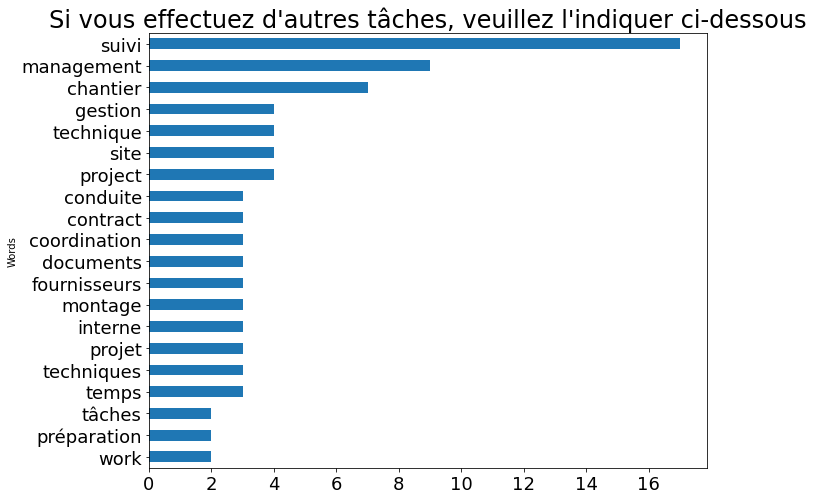

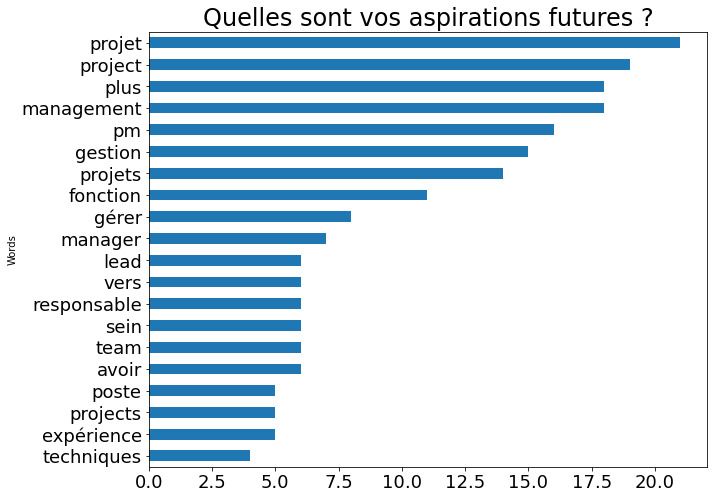

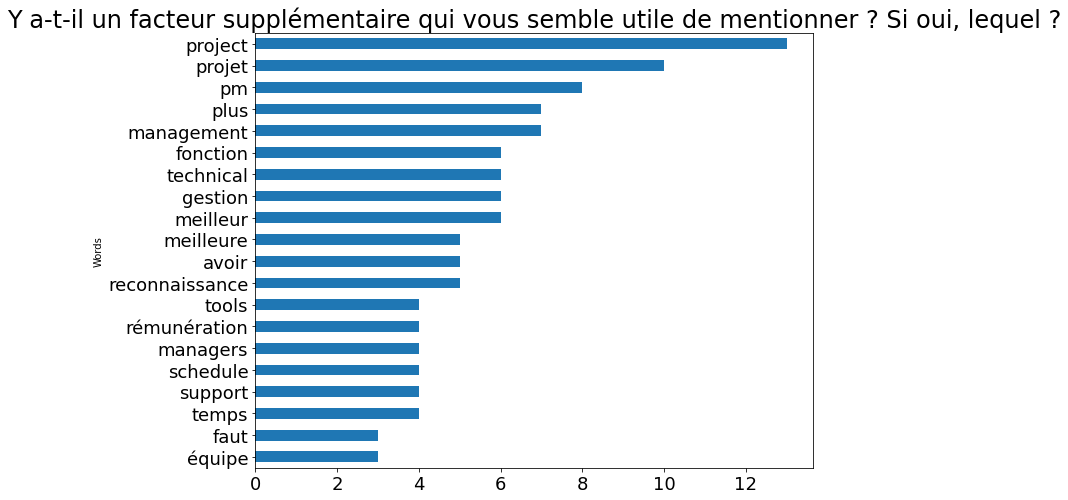

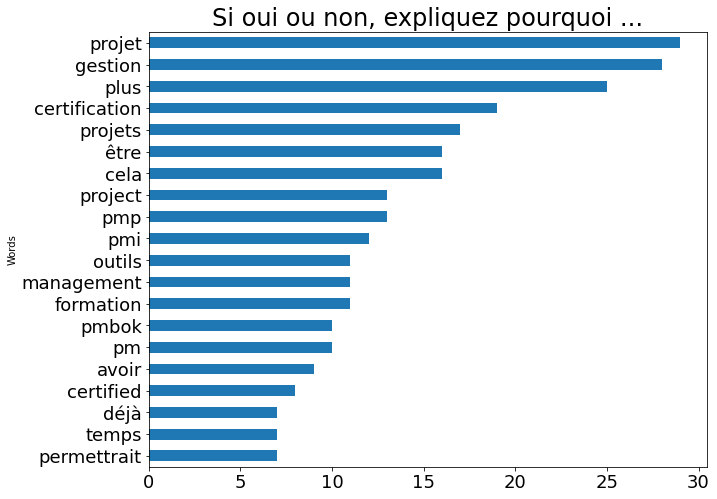

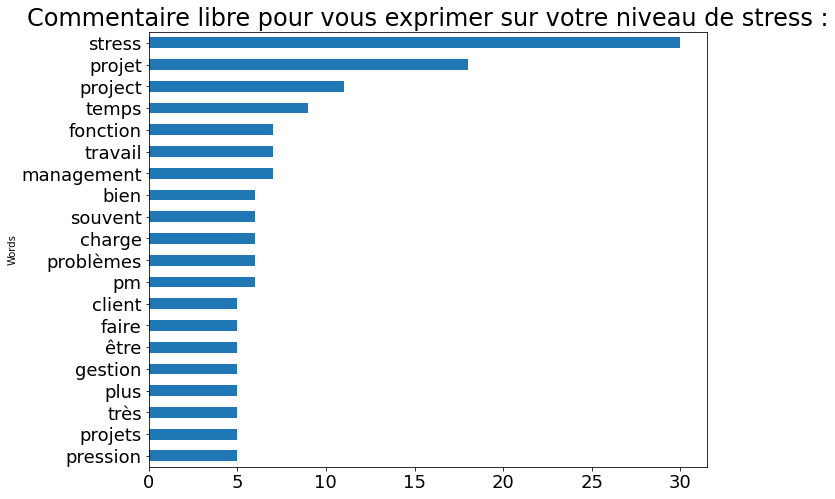

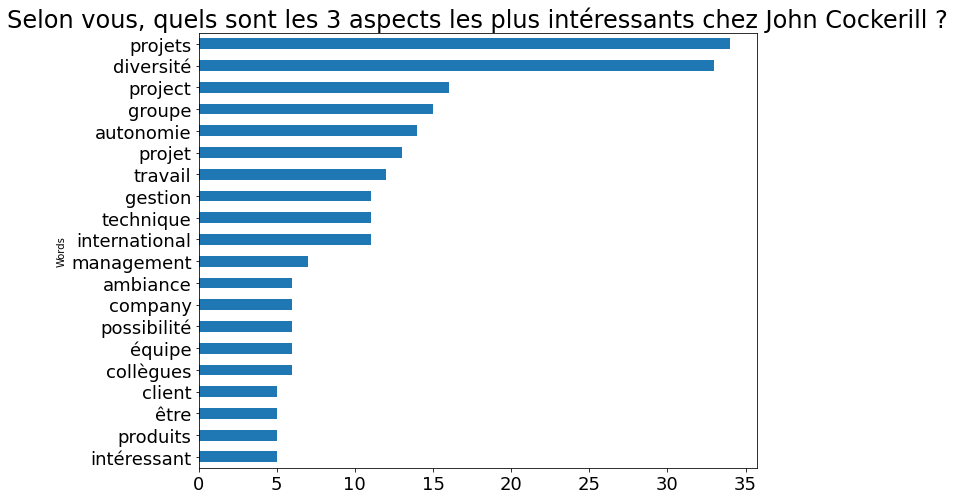

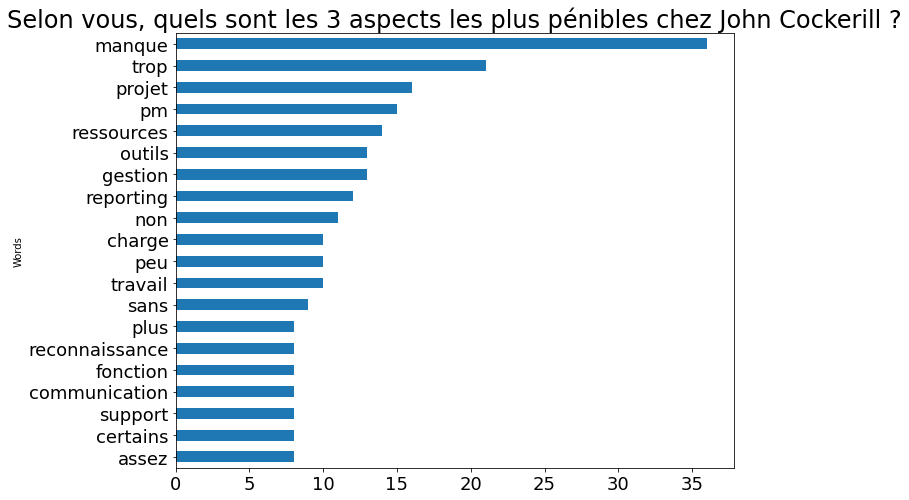

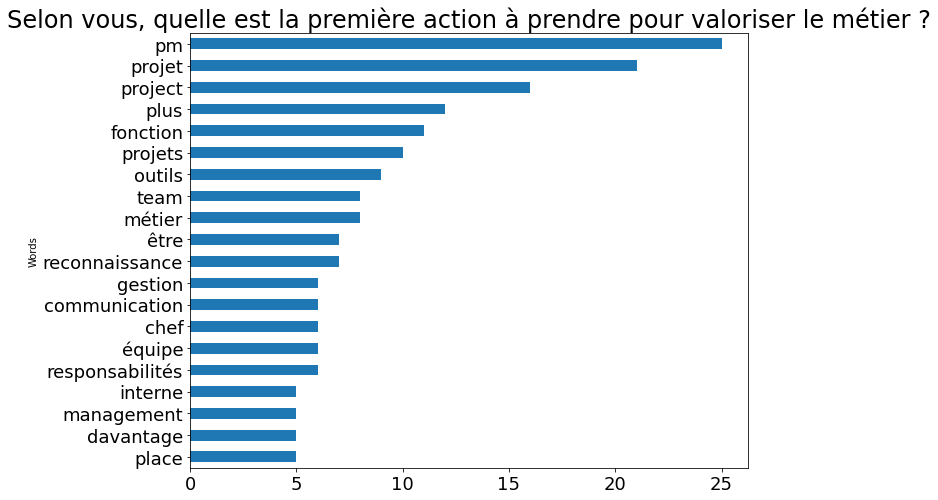

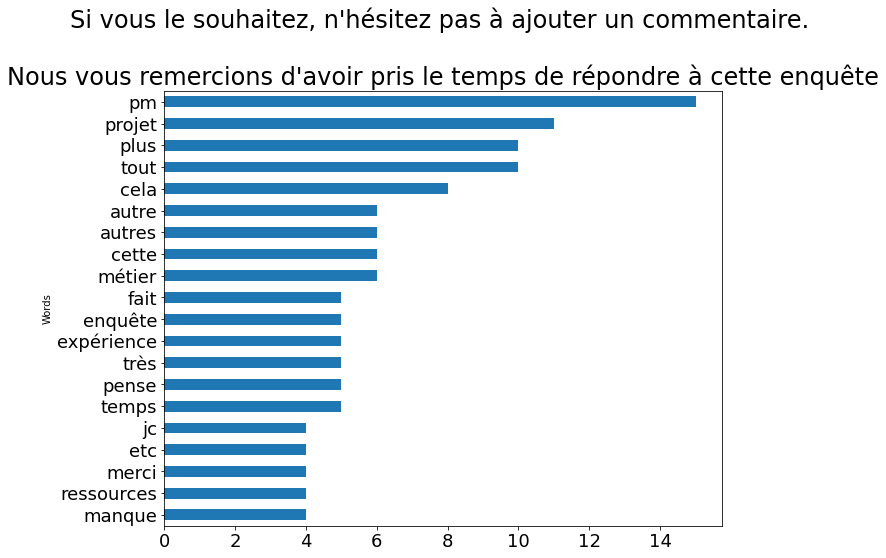

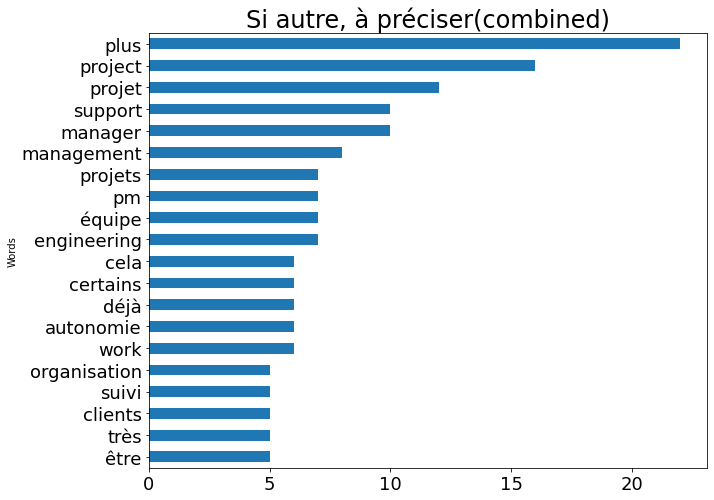

In [16]:
# Function to plot the most frequent words
for col in cols:
    print("***",col,"***")
    corpus = get_top_n_words(df[col], 20)
    for word, freq in corpus:
        print(word, freq)
    df_titles = pd.DataFrame(corpus, columns=['Words', 'count'])
    plt.figure(figsize=(10,8))
    df_titles.groupby('Words').sum()['count'].sort_values(ascending=True).plot(kind='barh', fontsize=18)
    plt.title(col, fontsize=24);